In [4]:
library(rstan)
library(here)
library(ggplot2)

# 計算の高速化
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())


In [2]:
file_beer_sales_2 <- read.csv(here("data", "3-2-1-beer-sales-2.csv"))
head(file_beer_sales_2, n = 3)


,sales,temperature
,<dbl>,<dbl>
1,41.68,13.7
2,110.99,24.0
3,65.32,21.5


In [3]:
sample_size <- nrow(file_beer_sales_2)


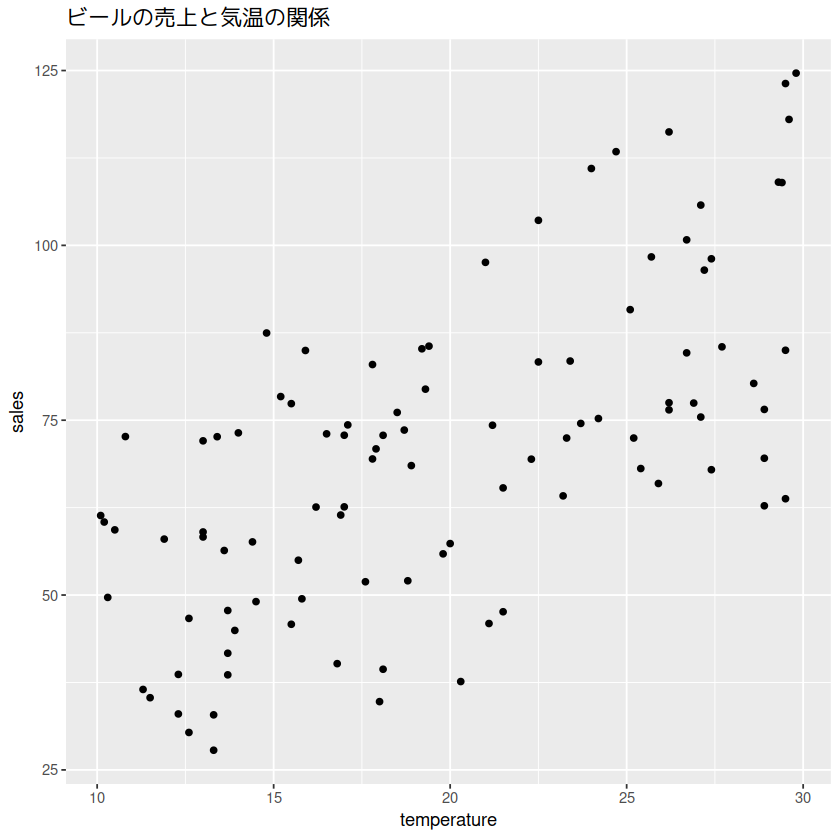

In [6]:
ggplot(file_beer_sales_2, aes(x = temperature, y = sales)) +
  geom_point() +
  labs(title = "ビールの売上と気温の関係")


In [7]:
# listにまとめる
data_list <- list(
  N = sample_size,
  sales = file_beer_sales_2$sales,
  temperature = file_beer_sales_2$temperature
)


In [10]:
# 乱数の生成
mcmc_result <- stan(
  file = "3-2-1-simple-lm-vec.stan",
  data = data_list,
  seed = 1
)


In [11]:
# MCMCサンプルの抽出
mcmc_sample <- rstan::extract(mcmc_result, permuted = FALSE)


This is bayesplot version 1.11.1

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting



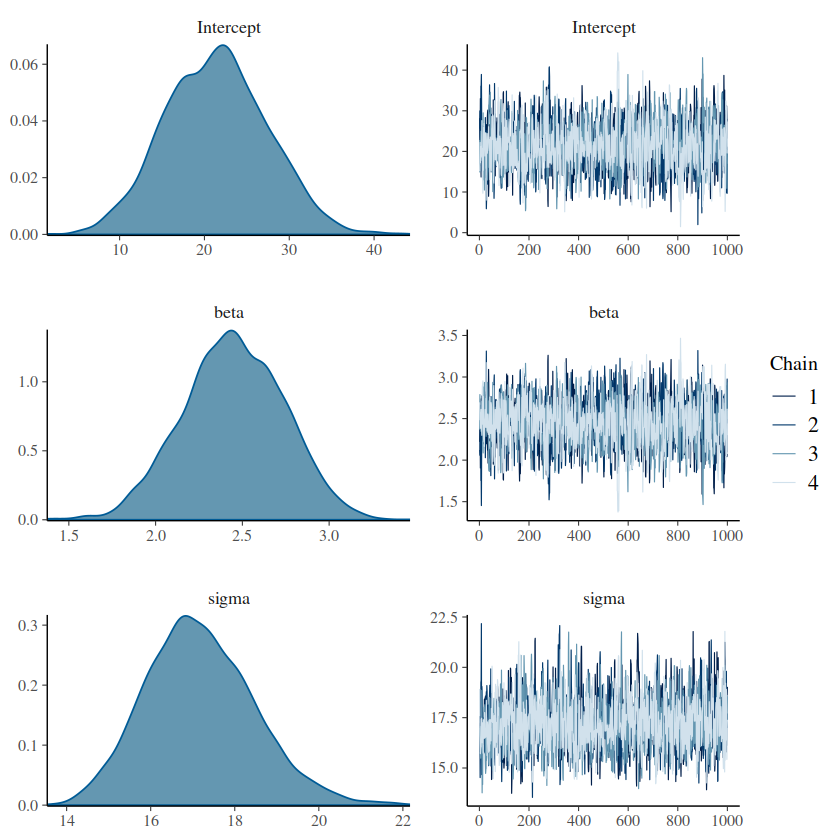

In [14]:
# トレースプロットと事後分布
library(bayesplot)
mcmc_combo(
  mcmc_sample,
  pars = c("Intercept", "beta", "sigma")
)


In [ ]:
mcmc_C